In [1]:
%load_ext autoreload
%autoreload 2

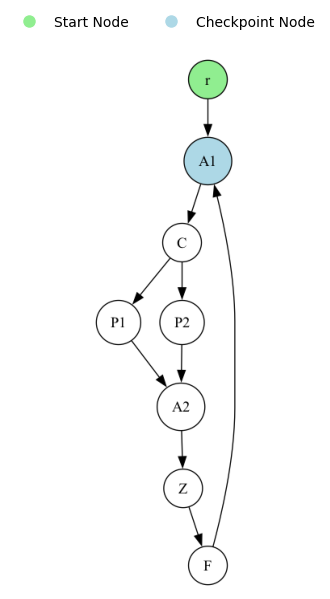

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from example_systems.example_complicated_system import ExampleSim
from tests.contractionTests.contraction_test import get_factor_from_list
ExampleSim().plot.render_graph()

In [3]:
sim = ExampleSim(reference_signal=20.0, weights="./weights/weights_basic_ReLU.pth")
# sim = ExampleReLUSim(reference_signal=-50.0, weights="./weights/weights_trained.pth")
sim.system.run(iterations=100)

Running Control System: 101it [00:00, 6545.60it/s]             


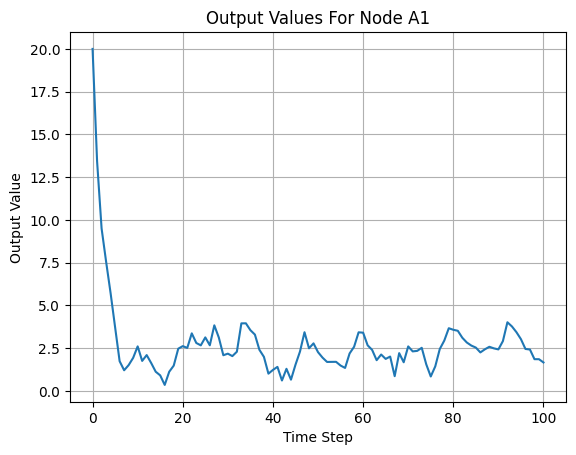

In [4]:
sim.plot.node_outputs("A1")

## Estimate agents' response probabilities

In [5]:
estimated_probs = sim.system.estimate_probabilities()
estimated_probs

[array([0.5105, 0.4895]), array([0.6855, 0.3145])]

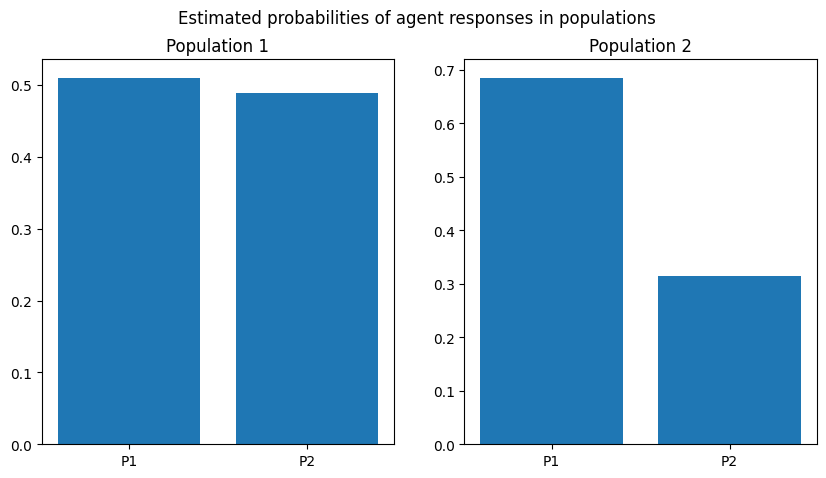

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax.flatten()
ii = 0
for prob in estimated_probs:
    ax[ii].set_title(f"Population {ii+1}")
    ax[ii].bar(['P1', 'P2'], prob)
    ii += 1
plt.suptitle("Estimated probabilities of agent responses in populations");

In [7]:
estimated_probs

[array([0.5105, 0.4895]), array([0.6855, 0.3145])]

In [8]:
eps = 0.05
reference_signals = np.array([20])

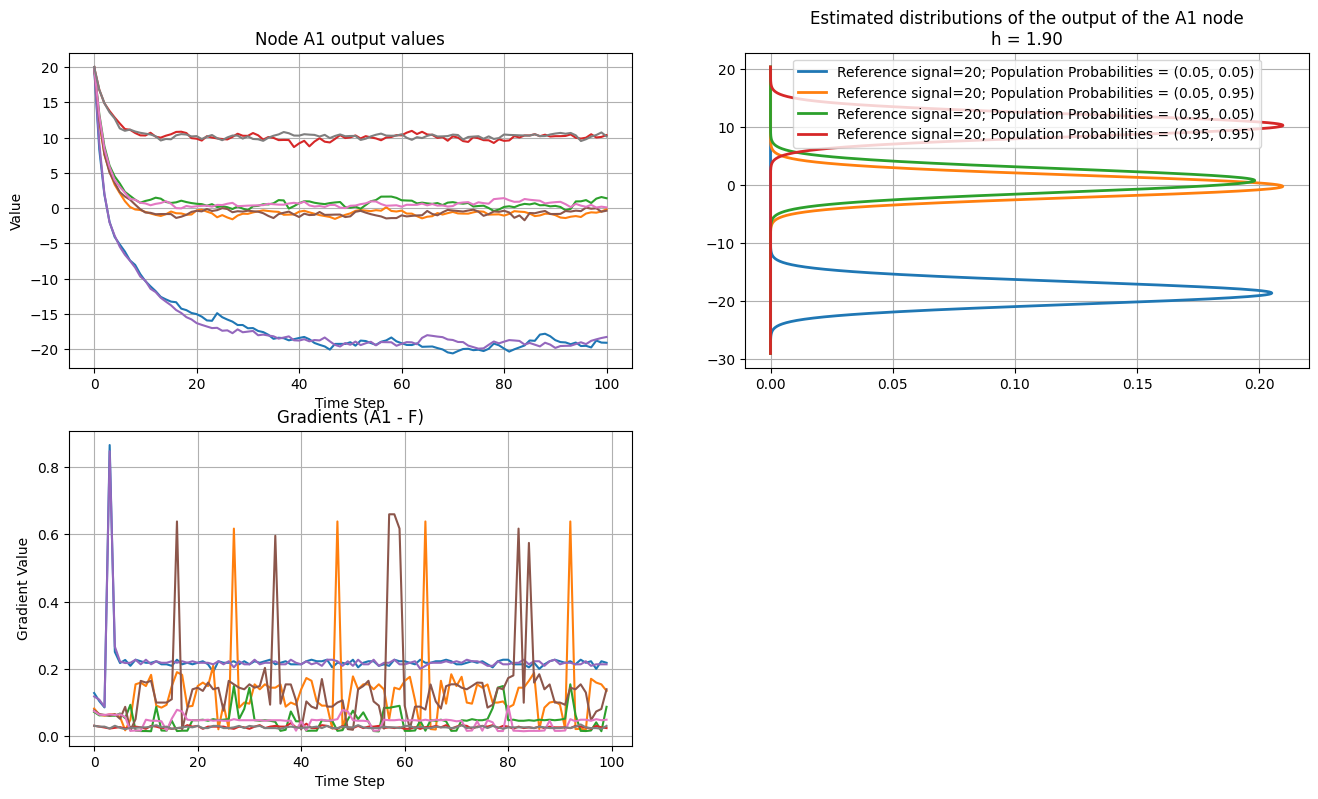

Approximated Contraction factor value for reference signal = 20 is equal to 0.46319233410272176


In [9]:
approximated_lipschitz = get_factor_from_list(reference_signals=reference_signals, agent_probs=np.array([[eps, 1.0-eps], [eps, 1.0-eps]]), prob_weights=estimated_probs, sim_class=ExampleSim, it=100, trials=2, weights="./weights/weights_basic_ReLU.pth", node_outputs_plot="A1", show_distributions_plot=True, show_distributions_histograms_plot=False)
for i in range(len(reference_signals)):
    print(f"Approximated Contraction factor value for reference signal = {reference_signals[i]} is equal to {approximated_lipschitz[i]}")